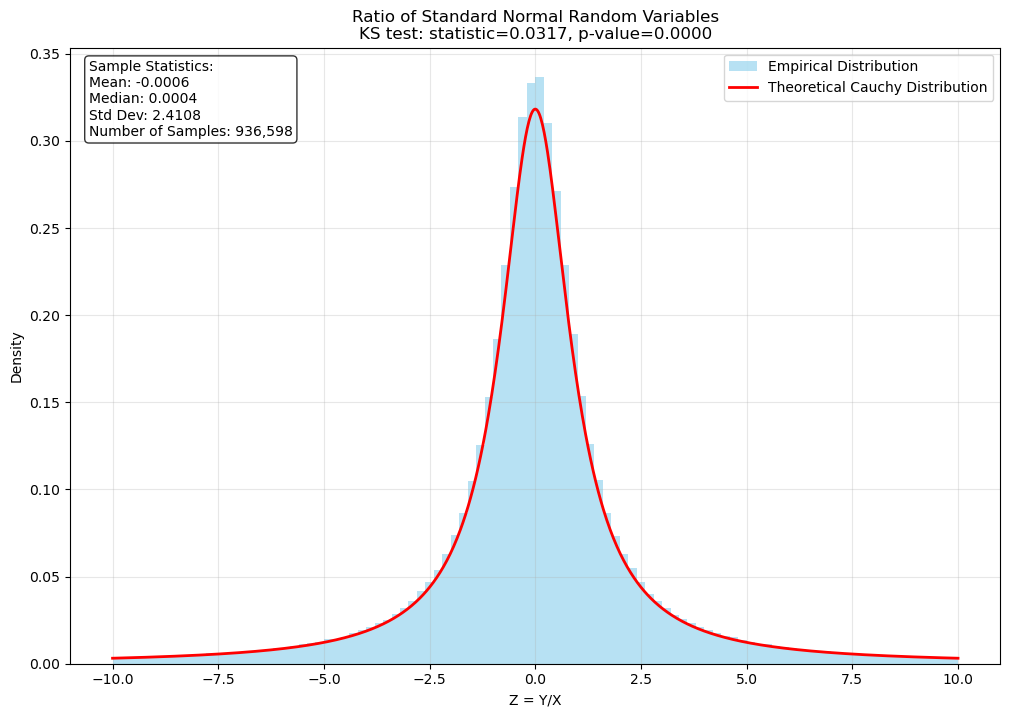


Validation of Properties:
1. Symmetry around 0:
  - Percentage of positive values: 0.5001
  - Percentage of negative values: 0.4999

2. Comparison of Quartiles:
  Theoretical vs Empirical
  Q1: -1.0000 vs -0.9022
  Q2: 0.0000 vs 0.0004
  Q3: 1.0000 vs 0.9045


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples for simulation
n_samples = 1000000

# Generate standard normal random variables
X = np.random.standard_normal(n_samples)
Y = np.random.standard_normal(n_samples)

# Calculate their ratio Z = Y/X
Z = Y / X

# Remove extreme outliers for better visualization
# Keep values within reasonable bounds ([-10, 10])
mask = (Z > -10) & (Z < 10)
Z_filtered = Z[mask]

# Create a range of z values for theoretical distribution
z = np.linspace(-10, 10, 1000)

# Calculate theoretical Cauchy PDF
theoretical_pdf = 1 / (np.pi * (1 + z**2))

# Create the visualization
plt.figure(figsize=(12, 8))

# Plot histogram of simulated data
plt.hist(Z_filtered, bins=100, density=True, alpha=0.6, 
         label='Empirical Distribution', color='skyblue')

# Plot theoretical Cauchy distribution
plt.plot(z, theoretical_pdf, 'r-', lw=2, 
         label='Theoretical Cauchy Distribution')

# Calculate and display KS test statistic
ks_statistic, p_value = stats.kstest(Z_filtered, 'cauchy')

# Add labels and title
plt.title('Ratio of Standard Normal Random Variables\n' +
          f'KS test: statistic={ks_statistic:.4f}, p-value={p_value:.4f}',
          fontsize=12)
plt.xlabel('Z = Y/X')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

# Add text box with key statistics
stats_text = (
    f'Sample Statistics:\n'
    f'Mean: {np.mean(Z_filtered):.4f}\n'
    f'Median: {np.median(Z_filtered):.4f}\n'
    f'Std Dev: {np.std(Z_filtered):.4f}\n'
    f'Number of Samples: {len(Z_filtered):,}'
)
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

# Print additional validation
print("\nValidation of Properties:")
print(f"1. Symmetry around 0:")
print(f"  - Percentage of positive values: {(Z_filtered > 0).mean():.4f}")
print(f"  - Percentage of negative values: {(Z_filtered < 0).mean():.4f}")

# Calculate theoretical quantiles
theoretical_quantiles = stats.cauchy.ppf([0.25, 0.5, 0.75])
empirical_quantiles = np.percentile(Z_filtered, [25, 50, 75])

print("\n2. Comparison of Quartiles:")
print("  Theoretical vs Empirical")
print(f"  Q1: {theoretical_quantiles[0]:.4f} vs {empirical_quantiles[0]:.4f}")
print(f"  Q2: {theoretical_quantiles[1]:.4f} vs {empirical_quantiles[1]:.4f}")
print(f"  Q3: {theoretical_quantiles[2]:.4f} vs {empirical_quantiles[2]:.4f}")

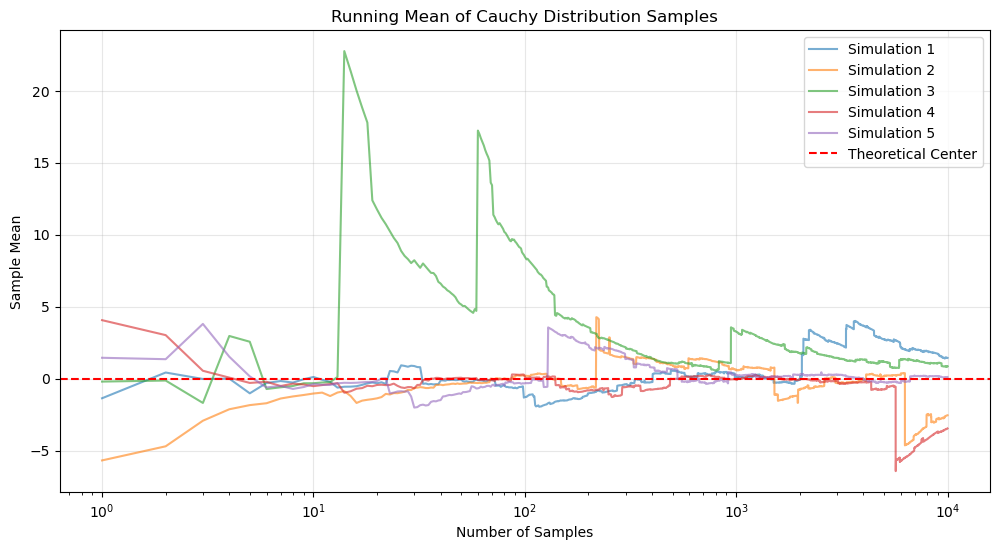


Final means from 20 different simulations:
Simulation 1: 34.22
Simulation 2: -0.74
Simulation 3: 0.31
Simulation 4: 1.87
Simulation 5: -0.17
Simulation 6: 3.07
Simulation 7: -6.93
Simulation 8: 1.00
Simulation 9: 2.81
Simulation 10: -1.56
Simulation 11: -4.21
Simulation 12: 0.70
Simulation 13: 0.29
Simulation 14: 17.70
Simulation 15: 0.50
Simulation 16: 0.11
Simulation 17: 3.52
Simulation 18: 0.10
Simulation 19: 1.78
Simulation 20: 9.05


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Function to calculate running mean of Cauchy samples
def running_mean_simulation(n_samples):
    X = np.random.standard_normal(n_samples)
    Y = np.random.standard_normal(n_samples)
    Z = Y / X
    running_means = np.cumsum(Z) / np.arange(1, len(Z) + 1)
    return running_means

# Simulate multiple times with different sample sizes
n_samples = 10000
n_simulations = 5

plt.figure(figsize=(12, 6))

for i in range(n_simulations):
    means = running_mean_simulation(n_samples)
    plt.plot(range(1, n_samples + 1), means, 
             alpha=0.6, label=f'Simulation {i+1}')

plt.axhline(y=0, color='r', linestyle='--', label='Theoretical Center')
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.title('Running Mean of Cauchy Distribution Samples')
plt.xlabel('Number of Samples')
plt.ylabel('Sample Mean')
plt.legend()
plt.show()

# Print some statistics about the final means
final_means = [running_mean_simulation(n_samples)[-1] for _ in range(20)]
print("\nFinal means from 20 different simulations:")
for i, mean in enumerate(final_means, 1):
    print(f"Simulation {i}: {mean:.2f}")


Confidence Intervals Comparison:

Level | Theoretical Interval | Empirical Interval
------------------------------------------------------------
50% | ( -1.00,   1.00) | ( -1.09,   0.90)
80% | ( -3.08,   3.08) | ( -2.84,   3.14)
90% | ( -6.31,   6.31) | ( -6.19,   5.68)
95% | (-12.71,  12.71) | (-10.48,  14.23)

Median Bootstrap 95% CI: (-0.21, -0.00)


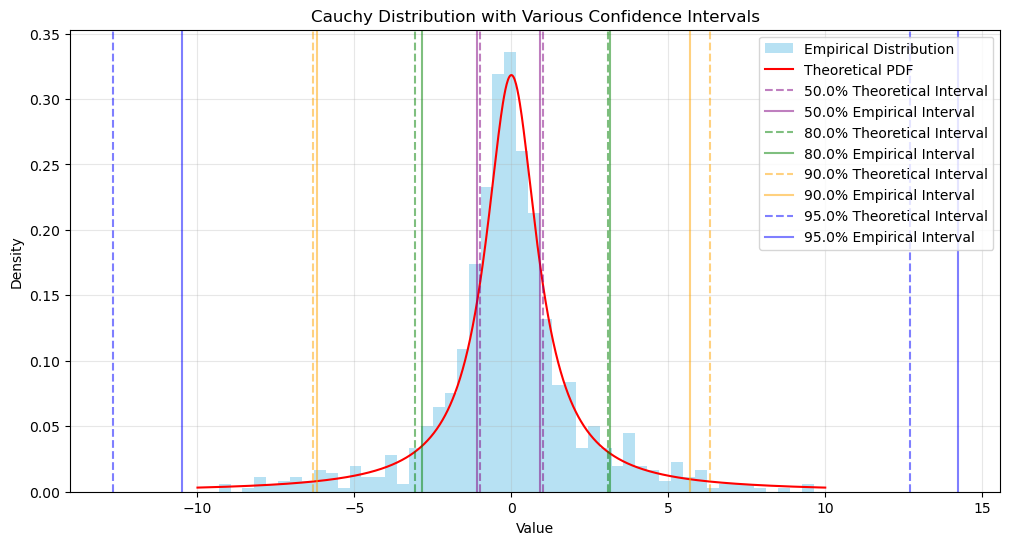

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

def generate_cauchy_sample(n):
    X = np.random.standard_normal(n)
    Y = np.random.standard_normal(n)
    return Y / X

# Generate samples and calculate robust intervals
n_samples = 1000
n_bootstrap = 1000
data = generate_cauchy_sample(n_samples)

# Calculate theoretical and empirical quantiles
confidence_levels = [0.50, 0.80, 0.90, 0.95]
theoretical_intervals = []
empirical_intervals = []

for conf in confidence_levels:
    alpha = 1 - conf
    # Theoretical quantiles from Cauchy distribution
    theoretical_interval = stats.cauchy.interval(conf)
    theoretical_intervals.append(theoretical_interval)
    
    # Empirical quantiles
    lower = np.percentile(data, alpha/2 * 100)
    upper = np.percentile(data, (1-alpha/2) * 100)
    empirical_intervals.append((lower, upper))

# Visualization
plt.figure(figsize=(12, 6))

# Plot histogram of data
plt.hist(data[np.abs(data) < 10], bins=50, density=True, alpha=0.6, 
         label='Empirical Distribution', color='skyblue')

# Plot theoretical Cauchy PDF
x = np.linspace(-10, 10, 1000)
plt.plot(x, stats.cauchy.pdf(x), 'r-', label='Theoretical PDF')

# Plot intervals
colors = ['purple', 'green', 'orange', 'blue']
for i, (conf, theo_int, emp_int) in enumerate(zip(confidence_levels, 
                                                theoretical_intervals, 
                                                empirical_intervals)):
    plt.axvline(theo_int[0], color=colors[i], linestyle='--', alpha=0.5)
    plt.axvline(theo_int[1], color=colors[i], linestyle='--', alpha=0.5,
                label=f'{conf*100}% Theoretical Interval')
    plt.axvline(emp_int[0], color=colors[i], linestyle='-', alpha=0.5)
    plt.axvline(emp_int[1], color=colors[i], linestyle='-', alpha=0.5,
                label=f'{conf*100}% Empirical Interval')

plt.title('Cauchy Distribution with Various Confidence Intervals')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

# Print numerical results
print("\nConfidence Intervals Comparison:")
print("\nLevel | Theoretical Interval | Empirical Interval")
print("-" * 60)
for conf, theo_int, emp_int in zip(confidence_levels, theoretical_intervals, 
                                 empirical_intervals):
    print(f"{conf*100:2.0f}% | ({theo_int[0]:6.2f}, {theo_int[1]:6.2f}) | ({emp_int[0]:6.2f}, {emp_int[1]:6.2f})")

# Calculate median and its bootstrap confidence interval
medians = []
for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    medians.append(np.median(bootstrap_sample))

median_ci = np.percentile(medians, [2.5, 97.5])
print(f"\nMedian Bootstrap 95% CI: ({median_ci[0]:.2f}, {median_ci[1]:.2f})")

## Financial Markets

When analyzing price-to-earnings ratios:
- Report the median P/E ratio
- Use quantile ranges for risk assessment
- Focus on relative rankings rather than absolute differences

## Best Practices for Reporting
When working with Cauchy-like data, you should:

- Always report the median rather than the mean
- Provide multiple confidence levels (e.g., 50%, 80%, 95%)
- Use bootstrap methods for additional robustness
- Be explicit about the limitations of traditional uncertainty measures
- Consider reporting both parametric (theoretical) and non-parametric (empirical) intervals

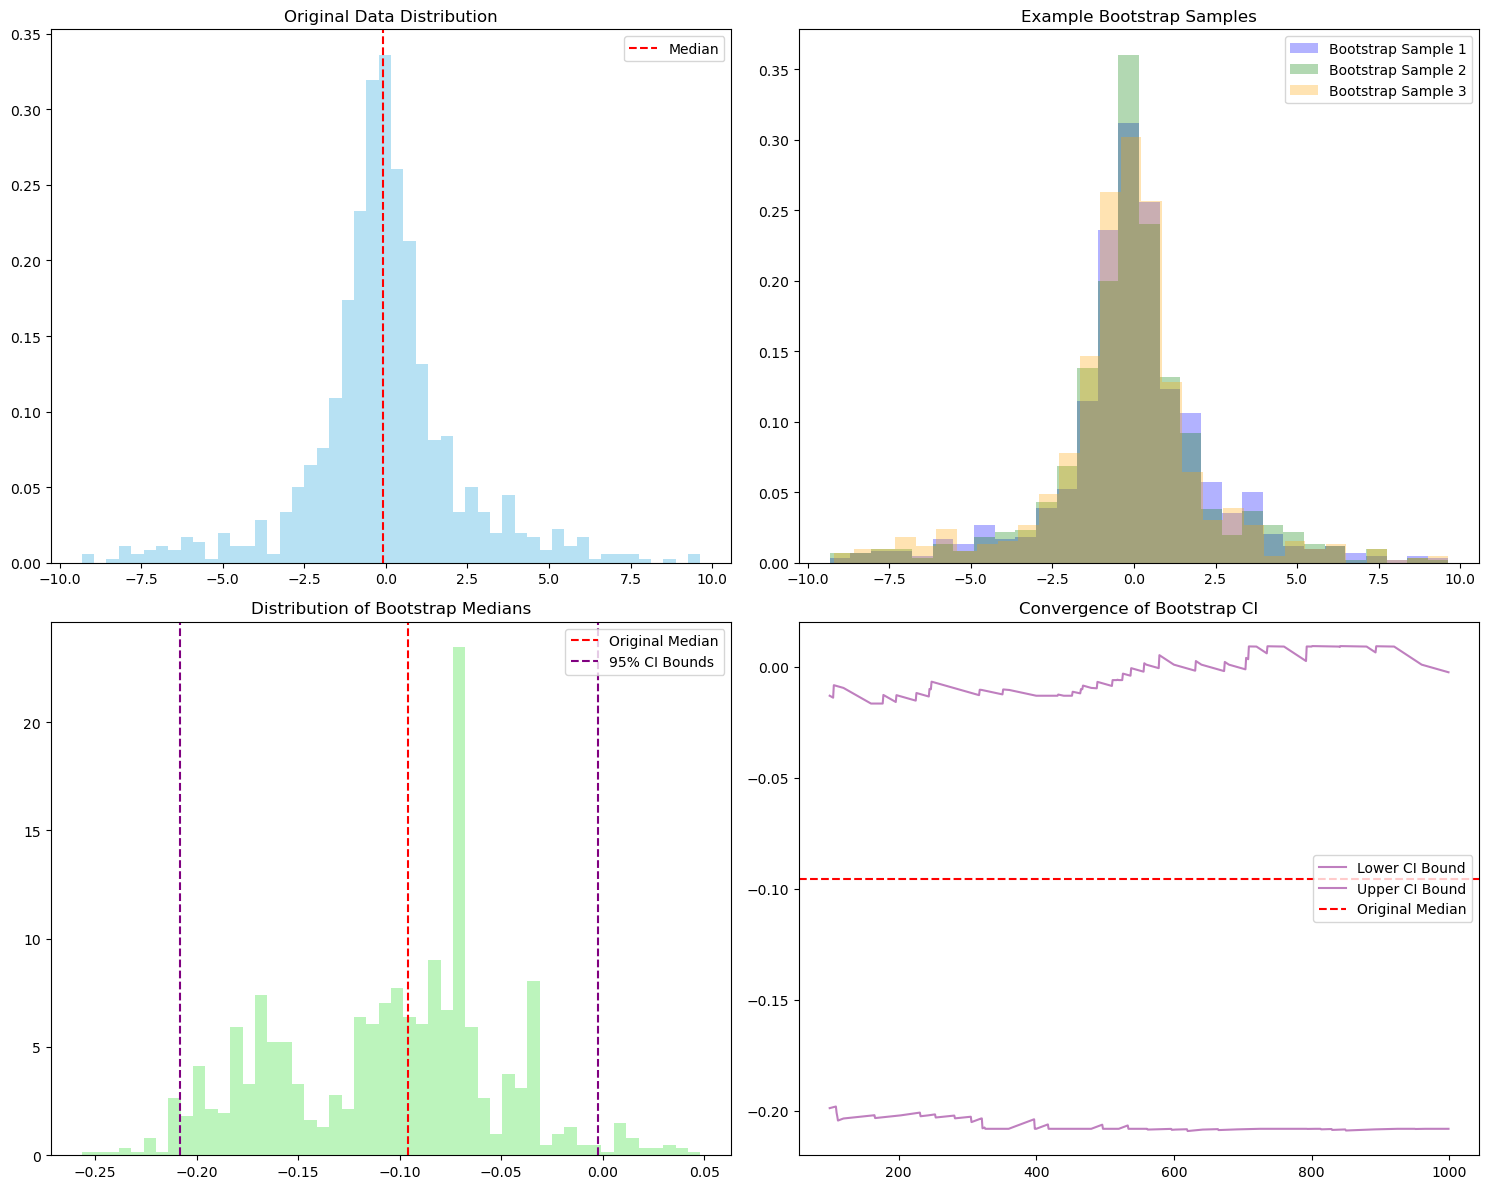


Bootstrap Analysis Results:
Original Sample Median: -0.0958
Bootstrap Median of Medians: -0.0962
95% Bootstrap CI: (-0.2081, -0.0025)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate original Cauchy sample
def generate_cauchy_sample(n):
    X = np.random.standard_normal(n)
    Y = np.random.standard_normal(n)
    return Y / X

# Original sample
n_samples = 1000
original_data = generate_cauchy_sample(n_samples)

# Perform bootstrap for median estimation
n_bootstrap = 1000
bootstrap_medians = []

# Store a few example bootstrap samples for visualization
example_bootstrap_samples = []
for i in range(n_bootstrap):
    # Generate bootstrap sample by resampling with replacement
    bootstrap_sample = np.random.choice(original_data, size=len(original_data), replace=True)
    bootstrap_medians.append(np.median(bootstrap_sample))
    
    # Store first 3 bootstrap samples for visualization
    if i < 3:
        example_bootstrap_samples.append(bootstrap_sample)

# Create visualization
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Original Data Distribution
axs[0, 0].hist(original_data[np.abs(original_data) < 10], bins=50, 
               density=True, alpha=0.6, color='skyblue')
axs[0, 0].axvline(np.median(original_data), color='red', 
                  linestyle='--', label='Median')
axs[0, 0].set_title('Original Data Distribution')
axs[0, 0].legend()

# Plot 2: Example Bootstrap Samples
colors = ['blue', 'green', 'orange']
for i, sample in enumerate(example_bootstrap_samples):
    axs[0, 1].hist(sample[np.abs(sample) < 10], bins=30, density=True, 
                   alpha=0.3, color=colors[i], 
                   label=f'Bootstrap Sample {i+1}')
axs[0, 1].set_title('Example Bootstrap Samples')
axs[0, 1].legend()

# Plot 3: Distribution of Bootstrap Medians
axs[1, 0].hist(bootstrap_medians, bins=50, density=True, 
               alpha=0.6, color='lightgreen')
axs[1, 0].axvline(np.median(original_data), color='red', 
                  linestyle='--', label='Original Median')
ci = np.percentile(bootstrap_medians, [2.5, 97.5])
axs[1, 0].axvline(ci[0], color='purple', linestyle='--', 
                  label='95% CI Bounds')
axs[1, 0].axvline(ci[1], color='purple', linestyle='--')
axs[1, 0].set_title('Distribution of Bootstrap Medians')
axs[1, 0].legend()

# Plot 4: Bootstrap Convergence
running_ci_lower = [np.percentile(bootstrap_medians[:i+1], 2.5) 
                   for i in range(100, n_bootstrap)]
running_ci_upper = [np.percentile(bootstrap_medians[:i+1], 97.5) 
                   for i in range(100, n_bootstrap)]

axs[1, 1].plot(range(100, n_bootstrap), running_ci_lower, 
               label='Lower CI Bound', color='purple', alpha=0.5)
axs[1, 1].plot(range(100, n_bootstrap), running_ci_upper, 
               label='Upper CI Bound', color='purple', alpha=0.5)
axs[1, 1].axhline(np.median(original_data), color='red', 
                  linestyle='--', label='Original Median')
axs[1, 1].set_title('Convergence of Bootstrap CI')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# Print numerical results
print("\nBootstrap Analysis Results:")
print(f"Original Sample Median: {np.median(original_data):.4f}")
print(f"Bootstrap Median of Medians: {np.median(bootstrap_medians):.4f}")
print(f"95% Bootstrap CI: ({ci[0]:.4f}, {ci[1]:.4f})")